<a href="https://colab.research.google.com/github/jokercsi/Investment-Portfolio-Optimization/blob/main/textMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import pickle
from nltk.corpus import stopwords
import re
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
# ライブラリの読み込み
import glob
import shutil
import os

import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('investingcomDB1.csv')
data['Title']

0                                            sampleTitle
1      U.S. rail strike averted, but labor deal faces...
2      Wall St tumbles amid Fed tightening jitters, e...
3      Elon Musk accuses Twitter of security lapses i...
4      FedEx Issues Massive Profit Warning as Global ...
                             ...                        
604    Dow Futures Up After Indices Tumble Into Bear ...
605    Inflation angst drags S&P 500 into bear market...
606    Morgan Stanley CEO sees 50% chance of U.S. rec...
607    Netflix announces another round of global hit ...
608    Stock Market Today: Dow Rattled, S&P 500 Close...
Name: Title, Length: 609, dtype: object

Reference
https://mkjjo.github.io/python/2019/07/09/english_preprocessing.html

In [7]:
data['Title'] = data['Title'].str.lower()
data

,Unnamed: 0,Title,Date,Publisher
0,0,sampletitle,sampleDate,samplePublisher
1,1,"u.s. rail strike averted, but labor deal faces...",2022-09-15 00:00:00,Reuters
2,2,"wall st tumbles amid fed tightening jitters, e...",2022-09-15 00:00:00,Reuters
3,3,elon musk accuses twitter of security lapses i...,2022-09-15 00:00:00,Reuters
4,4,fedex issues massive profit warning as global ...,2022-09-15 00:00:00,Investing.com
...,...,...,...,...
604,604,dow futures up after indices tumble into bear ...,2022-06-13 00:00:00,Investing.com
605,605,inflation angst drags s&p 500 into bear market...,2022-06-13 00:00:00,Reuters
606,606,morgan stanley ceo sees 50% chance of u.s. rec...,2022-06-13 00:00:00,Reuters
607,607,netflix announces another round of global hit ...,2022-06-13 00:00:00,Reuters


In [ ]:
NN_words = []

for i in data['Title']:
  # 토큰화
  word_tokens = nltk.word_tokenize(i)
  # 품사 분리
  tokens_pos = nltk.pos_tag(word_tokens)

  print(tokens_pos)
  for word, pos in tokens_pos:
      if 'NN' in pos:
          NN_words.append(word)


#print(NN_words)

[('sampletitle', 'NN')]
[('u.s.', 'JJ'), ('rail', 'NN'), ('strike', 'NN'), ('averted', 'VBD'), (',', ','), ('but', 'CC'), ('labor', 'NN'), ('deal', 'NN'), ('faces', 'VBZ'), ('tough', 'JJ'), ('union', 'NN'), ('votes', 'NNS')]
[('wall', 'NN'), ('st', 'NN'), ('tumbles', 'VBZ'), ('amid', 'IN'), ('fed', 'JJ'), ('tightening', 'VBG'), ('jitters', 'NNS'), (',', ','), ('economic', 'JJ'), ('rumblings', 'NNS')]
[('elon', 'NN'), ('musk', 'NN'), ('accuses', 'VBZ'), ('twitter', 'NN'), ('of', 'IN'), ('security', 'NN'), ('lapses', 'NNS'), ('in', 'IN'), ('court', 'NN'), ('filing', 'NN')]
[('fedex', 'NN'), ('issues', 'NNS'), ('massive', 'JJ'), ('profit', 'NN'), ('warning', 'NN'), ('as', 'IN'), ('global', 'JJ'), ('volumes', 'NNS'), ('plunge', 'VBP')]
[('stock', 'NN'), ('market', 'NN'), ('today', 'NN'), (':', ':'), ('dow', 'NN'), ('stumbles', 'NNS'), ('as', 'IN'), ('fears', 'NNS'), ('of', 'IN'), ('longer', 'JJR'), ('hawkish', 'JJ'), ('fed', 'NN'), ('policy', 'NN'), ('bite', 'NN')]
[('michigan', 'JJ'), ('s

In [ ]:
from nltk import Text

lis = []

text.plot(20)
plt.show()

In [ ]:
wlem = nltk.WordNetLemmatizer()
lemmatized_words = []
for word in NN_words:
    new_word = wlem.lemmatize(word)
    lemmatized_words.append(new_word)

print(lemmatized_words)

['sampletitle', 'rail', 'strike', 'labor', 'deal', 'union', 'vote', 'wall', 'st', 'jitter', 'rumbling', 'elon', 'musk', 'twitter', 'security', 'lapse', 'court', 'filing', 'fedex', 'issue', 'profit', 'warning', 'volume', 'stock', 'market', 'today', 'dow', 'stumble', 'fear', 'fed', 'policy', 'bite', 'sentiment', 'showcase', 'movie', 'premiere', 'thing', 's', 'p', 'slip', 'tech', 'energy', 'fear', 'rate', 'president', 'biden', 'ev', 'auto', 'show', 'rail', 'strike', 'labor', 'deal', 'union', 'vote', 'wall', 'st', 'jitter', 'rumbling', 'elon', 'musk', 'twitter', 'security', 'lapse', 'court', 'filing', 'fedex', 'issue', 'profit', 'warning', 'volume', 'stock', 'market', 'today', 'dow', 'stumble', 'fear', 'fed', 'policy', 'bite', 'sentiment', 'showcase', 'movie', 'premiere', 'thing', 's', 'p', 'slip', 'tech', 'energy', 'fear', 'rate', 'president', 'biden', 'ev', 'auto', 'show', 'stock', 'report', 'sale', 'claim', 'dow', 'future', 'pt', 'claim', 'sale', 'focus', 'hop', 'corvette', "'back", 'au

In [ ]:
stopwords_list = stopwords.words('english') #nltk에서 제공하는 불용어사전 이용
#print('stopwords: ', stopwords_list)
unique_NN_words = set(lemmatized_words)
final_NN_words = lemmatized_words

# 불용어 제거
for word in unique_NN_words:
    if word in stopwords_list:
        while word in final_NN_words: final_NN_words.remove(word)

In [ ]:
# 실제 작업시에는 txt 파일로 작업하는 걸 추천
customized_stopwords = ['be', 'today', 'yesterday', "it’s", "don’t"] # 직접 만든 불용어 사전

unique_NN_words1 = set(final_NN_words)
for word in unique_NN_words1:
    if word in customized_stopwords:
        while word in final_NN_words: final_NN_words.remove(word)

print(final_NN_words)

['sampletitle', 'rail', 'strike', 'labor', 'deal', 'union', 'vote', 'wall', 'st', 'jitter', 'rumbling', 'elon', 'musk', 'twitter', 'security', 'lapse', 'court', 'filing', 'fedex', 'issue', 'profit', 'warning', 'volume', 'stock', 'market', 'dow', 'stumble', 'fear', 'fed', 'policy', 'bite', 'sentiment', 'showcase', 'movie', 'premiere', 'thing', 'p', 'slip', 'tech', 'energy', 'fear', 'rate', 'president', 'biden', 'ev', 'auto', 'show', 'rail', 'strike', 'labor', 'deal', 'union', 'vote', 'wall', 'st', 'jitter', 'rumbling', 'elon', 'musk', 'twitter', 'security', 'lapse', 'court', 'filing', 'fedex', 'issue', 'profit', 'warning', 'volume', 'stock', 'market', 'dow', 'stumble', 'fear', 'fed', 'policy', 'bite', 'sentiment', 'showcase', 'movie', 'premiere', 'thing', 'p', 'slip', 'tech', 'energy', 'fear', 'rate', 'president', 'biden', 'ev', 'auto', 'show', 'stock', 'report', 'sale', 'claim', 'dow', 'future', 'pt', 'claim', 'sale', 'focus', 'hop', 'corvette', "'back", 'auto', 'show', 'unit', 'corebr

In [ ]:
from collections import Counter
c = Counter(final_NN_words) # input type should be a list of words (or tokens)
print(c)
k = 20
print(c.most_common(k)) # 빈도수 기준 상위 k개 단어 출력

Counter({'stock': 201, 'dow': 98, 'market': 82, 'p': 56, 'inflation': 46, 'future': 42, 'street': 42, 'musk': 41, 'earnings': 40, 'gain': 39, 'fear': 37, 'fed': 37, 'investor': 37, 'rate': 36, 'data': 36, 'tech': 34, 'deal': 29, 'hike': 29, 'twitter': 26, 'report': 25, 'energy': 24, '%': 22, 'rally': 22, 'rise': 22, 'powell': 21, 'share': 20, 'yield': 20, 'week': 19, 'dollar': 19, 'job': 19, 'recession': 19, 'elon': 18, 'tesla': 18, 'china': 18, 'growth': 18, 'apple': 17, 'fall': 17, 'end': 17, 'oil': 15, 'chip': 15, 'pt': 14, 'worry': 14, 'wall': 13, 'loss': 12, 'climb': 12, 'st': 11, 'bet': 11, 'bank': 11, 'profit': 10, 'thing': 10, 'slip': 10, 'sale': 10, 'claim': 10, 'rebound': 10, 'bill': 10, 'company': 10, 'concern': 10, 'eye': 10, 'biden': 9, 'year': 9, 'premarket': 9, 'russia': 9, 'bath': 9, 'close': 9, 'loom': 8, 'index': 8, 'worker': 8, 'bond': 8, 'session': 8, 'slump': 8, 'consumer': 8, 'abortion': 8, 'decision': 7, 'day': 7, 'point': 7, 'dip': 7, 'streak': 7, 'trump': 7, 'e

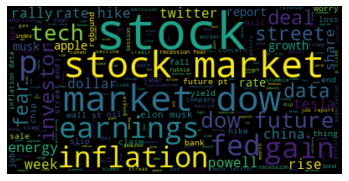

In [ ]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path


noun_text = ''
for word in final_NN_words:
    noun_text = noun_text +' '+word

wordcloud = WordCloud(max_font_size=60, relative_scaling=.5).generate(noun_text) # generate() 는 하나의 string value를 입력 받음
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

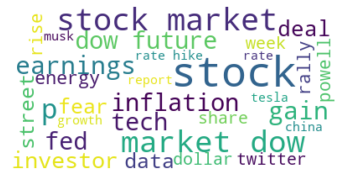

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=30, background_color='white', relative_scaling=.5).generate(noun_text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()